In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 

# Linear Basis Function (LBF)
$$y= u^⊤ α+[ϕ(x)]^⊤ β + ε$$
- $y$: surface air temperature
- $x$: year
- $ε$: random noise
- $u$:binary vector of dummy variables
  $u:= 〖[u_2,...,u_12]〗^⊤$
- $ϕ(x)$:the vector of basis function values
- $α, β$: the parameter vectors


Three families of basis function are considered for computing ϕ(x).

1. polynomial basis functions

$ϕ(x)≔[1,ϕ_1 (x),…,ϕ_p (x)]^⊤$ with
$ϕ_1 (x)≔x^i$

2. piece-wise constant basis functions

$ϕ(x)≔[1,γ_1 (x),…,γ_k (x)]^⊤$  with
$γ_i (x)≔I(x>t_i)$
- $I(x>t_i)$ is an indicator function defined by 
$I(x>t_i )≔
\begin{cases}
	1~~~~if~x>t_i\\
	0~~~~if~x≤ t_i 
	\end{cases}$
- ${t_i}^k$: the break point:
  
  $t_i≔x_{min}+i(x_{max}-x_{min})/(k+1)$                                                      

3. piece-wise linear basis functions

$ϕ(x)≔[1,γ_1 (x),…,γ_k (x)]^⊤$ with
$γ_i (x)≔(x-t_i )I(x>t_i)$
- $I(x>t_i )≔
\begin{cases}
1~~~if~x>t_i\\
0~~~if~x≤ t_i 
\end{cases}$
- ${t_i}^k$: the break point:

  $t_i≔x_{min}+i(x_{max}-x_{min})/(k+1)$            

In [ ]:
# polynomial basis functions
def design_mat_pol(x, p):
    n = len(x)
    phi_mat = np.ones((n, 1))
    for i in range(1, p + 1):
        phi_i = (x ** i).reshape(-1, 1)
        phi_mat = np.hstack((phi_mat, phi_i))
    return phi_mat

# piece-wise constant basis functions
def design_mat_pwc(x, k):
    x_min = np.min(x)
    x_max = np.max(x)
    n = len(x)
    phi_mat = np.ones((n, 1))
    for i in range(1, k + 1):
        t = x_min + i * (x_max - x_min) / (k + 1)
        phi_i = (x > t)
        phi_mat = np.hstack((phi_mat, phi_i.reshape(-1, 1)))
    return phi_mat
# piece-wise linear basis functions
def design_mat_pwl(x, k):
    x_min = np.min(x)
    x_max = np.max(x)
    n = len(x)
    phi_mat = np.hstack((np.ones((n, 1)), x.reshape(-1, 1)))
    for i in range(1, k + 1):
        t = x_min + i * (x_max - x_min) / (k + 1)
        phi_i = (x - t) * (x > t)
        phi_mat = np.hstack((phi_mat, phi_i.reshape(-1, 1)))
    return phi_mat

def np_predict(xmat, y):
    bhat = np.linalg.inv(xmat.T @ xmat) @ xmat.T @ y
    yhat = xmat @ bhat
    return yhat

def skl_predict(xmat, y):
    lr = LinearRegression(fit_intercept=False)
    lr.fit(xmat, y)
    yhat = lr.predict(xmat)
    print('Rank:{}/{}'.format(lr.rank_, xmat.shape[1]))
    return yhat

def np_predict_new(phi_mat, y, phi_mat_new):
    b_hat = np.linalg.inv(phi_mat.T @ phi_mat) @ phi_mat.T @ y
    y_hat = phi_mat_new @ b_hat
    return y_hat

def skl_predict_new(phi_mat, y, phi_mat_new):
    lr = LinearRegression(fit_intercept=False)
    lr.fit(phi_mat, y)
    y_hat = lr.predict(phi_mat_new)
    return y_hat   

# load data

In [2]:
# Read temperature data from file
data = pd.read_csv('surf_temp.csv')

# Create a matrix of indicators
umat = pd.get_dummies(data['month'], drop_first=True, dtype=int).values
umat


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 1. polynomial

Rank:14/15
[ 1  2  3  4  5  6  7  8  9 10]
[0.03179737 0.02100598 0.02105975 0.02107016 0.02151321 0.02151768
 0.02146495 0.02171523 0.02136507 0.02126742]
The optimal p=2


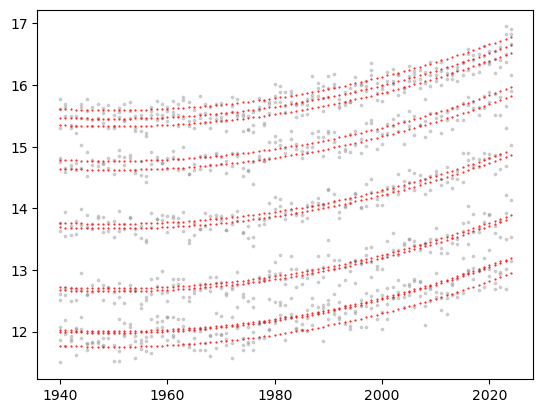

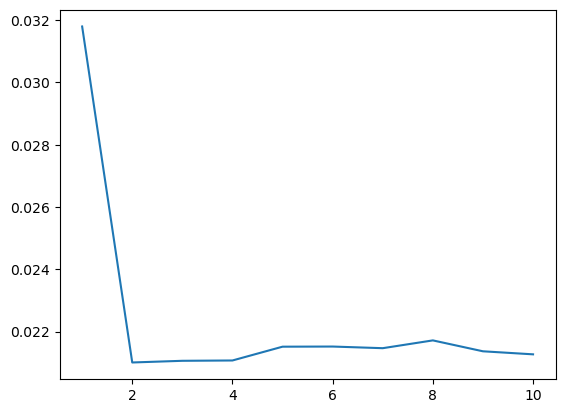

In [3]:
y = data['temp'].values
x = data['year'].values
     
phimat_1 = design_mat_pol(x, 3)
xmat_1 = np.hstack((phimat_1, umat))
yhat_1 = skl_predict(xmat_1, y)
plt.scatter(x, y, color='grey', s=3, alpha=0.3)
plt.plot(x, yhat_1, 'r.', markersize=1.0)
plt.show()

y = data['temp'].to_numpy(dtype=float)
x = data[['year', 'month']].to_numpy(dtype=float)

# Re-scale 'year' column 
x[:, 0] = (x[:, 0] - 1940) / 84

x_tv, x_test, y_tv, y_test = train_test_split(
    x, y, test_size=1/4, random_state=1)
x_train, x_vali, y_train, y_vali = train_test_split(
    x_tv, y_tv, test_size=1/3, random_state=1)

p = np.arange(1, 11)
print(p)

umat_train_1 = pd.get_dummies(x_train[:, 1], drop_first=True, dtype=int).values
umat_vali_1 = pd.get_dummies(x_vali[:, 1], drop_first=True, dtype=int).values

n_p_1 = len(p)
mse_vali_1 = np.empty(n_p_1)
for i in range(n_p_1):
    phimat_1 = design_mat_pol(x_train[:, 0], p[i])
    phimat_new_1 = design_mat_pol(x_vali[:, 0], p[i])
    xmat_1 = np.hstack((phimat_1, umat_train_1))
    xmat_new_1 = np.hstack((phimat_new_1, umat_vali_1))
    yhat_1 = skl_predict_new(xmat_1, y_train, xmat_new_1)
    mse_vali_1[i] = mse(y_vali, yhat_1)

print(mse_vali_1)

plt.plot(p, mse_vali_1)
plt.title('Piece-Wise Constant')
plt.xlabel('Number Of Break Points')
plt.ylabel('Validation MSE')
plt.show()

print('The optimal p={}'.format(p[np.argmin(mse_vali_1)]))


MSE of polynomial basis function on test set: 0.023243210325753907


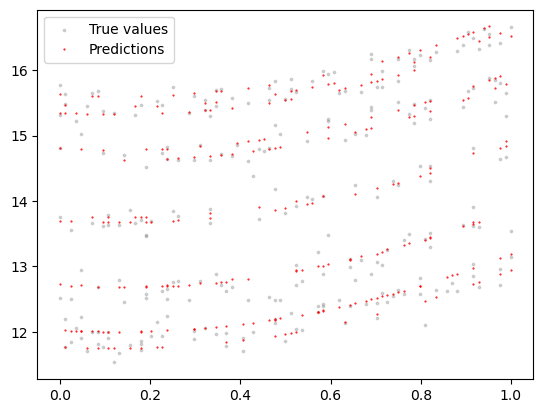

In [4]:
p_optimal = 2

phimat_tv_1 = design_mat_pol(x_tv[:, 0], p_optimal)
umat_tv_1 = pd.get_dummies(x_tv[:, 1], drop_first=True, dtype=int).values
xmat_tv_1 = np.hstack((phimat_tv_1, umat_tv_1))

lr_pol = LinearRegression(fit_intercept=False)
lr_pol.fit(xmat_tv_1,y_tv)

phimat_test_1 = design_mat_pol(x_test[:, 0], p_optimal)
umat_test_1 = pd.get_dummies(x_test[:, 1], drop_first=True, dtype=int).values
xmat_test_1 = np.hstack((phimat_test_1, umat_test_1))


yhat_test_1 = skl_predict_new(xmat_tv_1, y_tv, xmat_test_1)


mse_test_pol = mse(y_test, yhat_test_1)
print(f'MSE of polynomial basis function on test set: {mse_test_pol}')

plt.scatter(x_test[:, 0], y_test, color='grey', s=3, alpha=0.3, label='True values')
plt.plot(x_test[:, 0], yhat_test_1, 'r.', markersize=1.0, label='Predictions')
plt.legend()
plt.show()

## 2. piece-wise linear

[0.02199306 0.02067222 0.02165389 0.02119438 0.02154077 0.02104248
 0.02011698 0.02054361 0.02100394 0.02174609 0.02078856 0.02145687
 0.02002061 0.02102295 0.02038377 0.01929837 0.02136777 0.01900966
 0.01967369 0.01744004 0.01902778 0.01866837 0.0185401  0.01888549
 0.01750161 0.01746284 0.01649825 0.01769243 0.01744359 0.01690354]
The optimal k=27


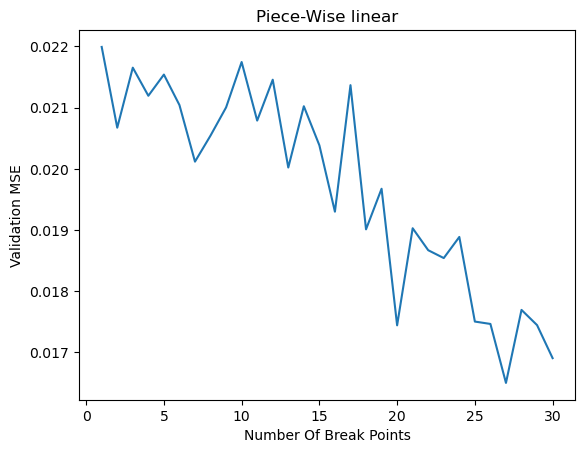

In [14]:


# Updated!
umat_train_2 = pd.get_dummies(x_train[:, 1], drop_first=True, dtype=int).values
umat_vali_2 = pd.get_dummies(x_vali[:, 1], drop_first=True, dtype=int).values

k = np.arange(1, 31)
#k

n_k = len(k)
mse_vali_2 = np.empty(n_k)
for i in range(n_k):
    phimat_2 = design_mat_pwl(x_train[:, 0], k[i])
    phimat_new_2 = design_mat_pwl(x_vali[:, 0], k[i])
    xmat_2 = np.hstack((phimat_2, umat_train_2))
    xmat_new_2 = np.hstack((phimat_new_2, umat_vali_2))
    yhat_2 = skl_predict_new(xmat_2, y_train, xmat_new_2)
    mse_vali_2[i] = mse(y_vali, yhat_2)

print(mse_vali_2)

plt.plot(k, mse_vali_2)
plt.title('Piece-Wise linear')
plt.xlabel('Number Of Break Points')
plt.ylabel('Validation MSE')
plt.show()  

print('The optimal k={}'.format(k[np.argmin(mse_vali_2)]))

MSE of piece-wise linear basis function on test set: 0.0180


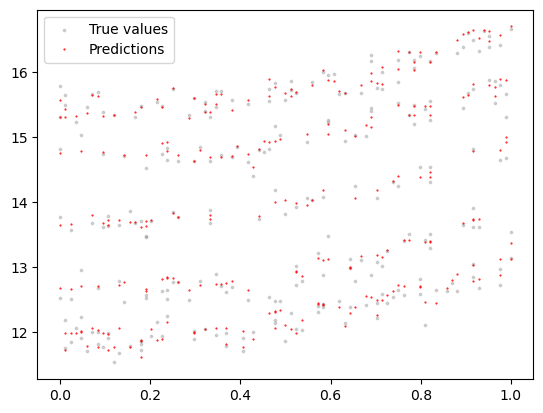

In [6]:
k_optimal_pwl = 27

phimat_tv_2 = design_mat_pwl(x_tv[:, 0], k_optimal_pwl)
umat_tv_2 = pd.get_dummies(x_tv[:, 1], drop_first=True, dtype=int).values
xmat_tv_2 = np.hstack((phimat_tv_2, umat_tv_2))

lr_pol = LinearRegression(fit_intercept=False)
lr_pol.fit(xmat_tv_2,y_tv)


umat_test_2 = pd.get_dummies(x_test[:, 1], drop_first=True, dtype=int).values
phimat_test_2 = design_mat_pwl(x_test[:, 0], k_optimal_pwl)
xmat_test_2 = np.hstack((phimat_test_2, umat_test_2))


yhat_test_2 = skl_predict_new(xmat_tv_2, y_tv, xmat_test_2)


mse_test_pwl = mse(y_test, yhat_test_2)
print('MSE of piece-wise linear basis function on test set: {:.4f}'.format(mse_test_pwl))

plt.scatter(x_test[:, 0], y_test, color='grey', s=3, alpha=0.3, label='True values')
plt.plot(x_test[:, 0], yhat_test_2, 'r.', markersize=1.0, label='Predictions')
plt.legend()
plt.show()

## 3. piece-wise constent

[0.06115991 0.03812546 0.0323274  0.03104668 0.02924497 0.02065414
 0.02417979 0.02044466 0.02462605 0.02030005 0.02470377 0.02112916
 0.02065758 0.02045143 0.01999018 0.02044394 0.01920362 0.02111883
 0.02067523 0.0202546  0.02067866 0.01868826 0.02050478 0.01736259
 0.02032218 0.0200638  0.01837087 0.01836437 0.01819162 0.01828215]
The optimal k=24


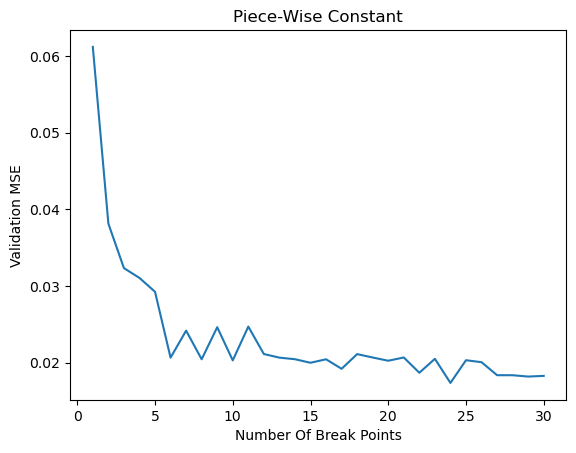

In [13]:
umat_3 = pd.get_dummies(x_train[:, 1], drop_first=True, dtype=int).values
umat_new_3 = pd.get_dummies(x_vali[:, 1], drop_first=True, dtype=int).values

k = np.arange(1, 31)
k

n_k_3 = len(k)
mse_vali_3 = np.empty(n_k_3)
for i in range(n_k_3):
    phimat_3 = design_mat_pwc(x_train[:, 0], k[i])
    phimat_new_3 = design_mat_pwc(x_vali[:, 0], k[i])
    xmat_3 = np.hstack((phimat_3, umat_3))
    xmat_new_3 = np.hstack((phimat_new_3, umat_new_3))
    yhat_3 = skl_predict_new(xmat_3, y_train, xmat_new_3)
    mse_vali_3[i] = mse(y_vali, yhat_3)

print(mse_vali_3)

plt.plot(k, mse_vali_3)
plt.title('Piece-Wise Constant')
plt.xlabel('Number Of Break Points')
plt.ylabel('Validation MSE')
plt.show()    

print('The optimal k={}'.format(k[np.argmin(mse_vali_3)]))

MSE of piece-wise linear basis function on test set: 0.0206


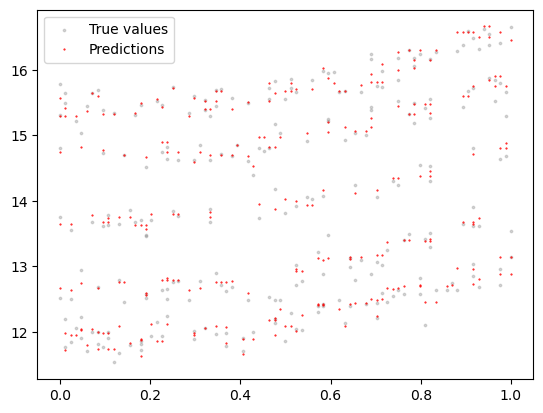

In [8]:
k_optimal_pwc = 24

umat_tv_3 = pd.get_dummies(x_tv[:, 1], drop_first=True, dtype=int).values
phimat_tv_3 = design_mat_pwc(x_tv[:, 0], k_optimal_pwc)
xmat_tv_3 = np.hstack((phimat_tv_3, umat_tv_3))

lr_pwc = LinearRegression(fit_intercept=False)
lr_pwc.fit(xmat_tv_3, y_tv)

umat_test_3 = pd.get_dummies(x_test[:, 1], drop_first=True, dtype=int).values
phimat_test_3 = design_mat_pwc(x_test[:, 0], k_optimal_pwc)
xmat_test_3 = np.hstack((phimat_test_3, umat_test_3))

yhat_test_3 = skl_predict_new(xmat_tv_3, y_tv, xmat_test_3)

mse_test_pwc = mse(y_test, yhat_test_3)

print('MSE of piece-wise linear basis function on test set: {:.4f}'.format(mse_test_pwc))

plt.scatter(x_test[:, 0], y_test, color='grey', s=3, alpha=0.3, label='True values')
plt.plot(x_test[:, 0], yhat_test_3, 'r.', markersize=1.0, label='Predictions')
plt.legend()
plt.show()

## compare the MSE

In [9]:
print('{:.4f}'.format(mse_test_pol))
print('{:.4f}'.format(mse_test_pwl))
print('{:.4f}'.format(mse_test_pwc))


0.0232
0.0180
0.0206


## prediction

In [10]:
umat_train = pd.get_dummies(x_train[:, 1], drop_first=True, dtype=int).values

phimat_pwl = design_mat_pwl(x_train[:, 0], k_optimal_pwl)
xmat_pwl = np.hstack((phimat_pwl, umat_train))

lr = LinearRegression(fit_intercept=False)
lr.fit(xmat_pwl, y_train)

future_years = np.array([(2024 - 1940)/84, (2024 - 1940)/84, (2024 - 1940)/84])
future_years = future_years.reshape(-1, 1)
future_months = np.array([10, 11, 12])
future_months = future_months.reshape(-1, 1)

x_future = np.hstack((future_years, future_months))


all_months = pd.DataFrame({'month': range(1, 13)})
future_months_df = pd.DataFrame({'month': np.array([10, 11, 12])})
umat_future_full = pd.get_dummies(all_months['month'], drop_first=True)
umat_future = umat_future_full.loc[future_months_df.index].values


phimat_future = design_mat_pwl(x_future[:, 0], k_optimal_pwl)
xmat_future = np.hstack((phimat_future, umat_future))


future_temps = lr.predict(xmat_future)

print('October 2024:{:.2f}'.format(future_temps[0]))
print('November 2024:{:.2f}'.format(future_temps[1]))
print('December 2024:{:.2f}'.format(future_temps[2]))


October 2024:13.92
November 2024:14.18
December 2024:14.86


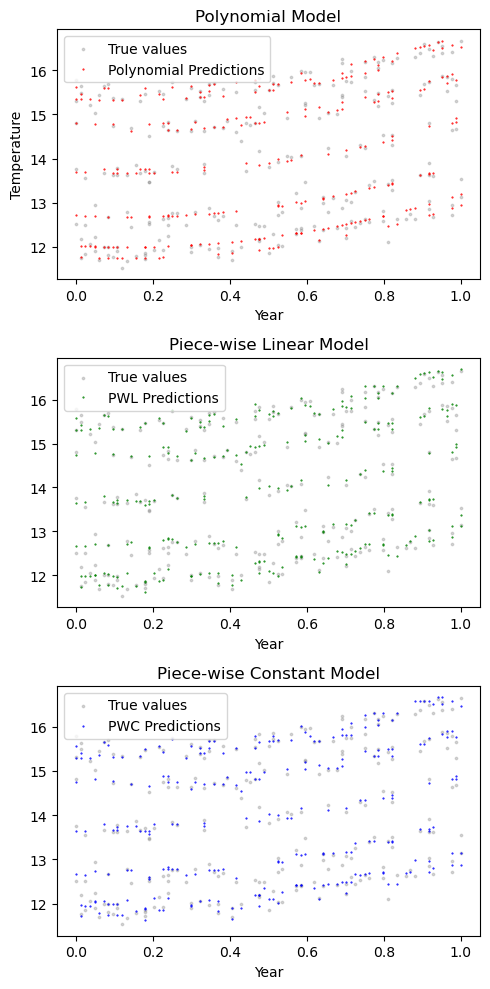

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(5, 10))

axs[0].scatter(x_test[:, 0], y_test, color='grey', s=3, alpha=0.3, label='True values')
axs[0].plot(x_test[:, 0], yhat_test_1, 'r.', markersize=1.0, label='Polynomial Predictions')
axs[0].set_title('Polynomial Model')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Temperature')
axs[0].legend()

axs[1].scatter(x_test[:, 0], y_test, color='grey', s=3, alpha=0.3, label='True values')
axs[1].plot(x_test[:, 0], yhat_test_2, 'g.', markersize=1.0, label='PWL Predictions')
axs[1].set_title('Piece-wise Linear Model')
axs[1].set_xlabel('Year')
axs[1].legend()

axs[2].scatter(x_test[:, 0], y_test, color='grey', s=3, alpha=0.3, label='True values')
axs[2].plot(x_test[:, 0], yhat_test_3, 'b.', markersize=1.0, label='PWC Predictions')
axs[2].set_title('Piece-wise Constant Model')
axs[2].set_xlabel('Year')
axs[2].legend()

plt.tight_layout()
plt.show()